## 线性回归代码实现

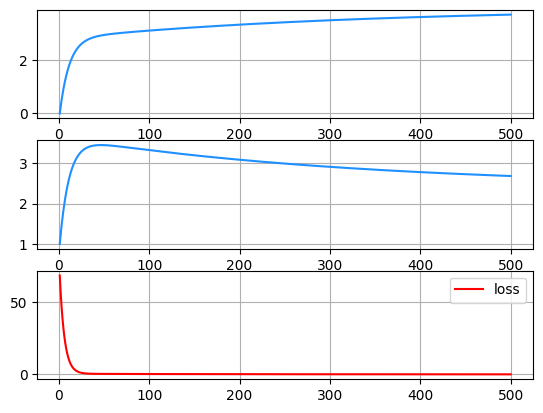

In [2]:
'''
    使用梯度下降的原理来实现线性回归
'''
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.5, 0.6, 0.8, 1.1, 1.4])
y = np.array([5.0, 5.5, 6.0, 6.8, 7.2])

# 实现梯度下降
# 模型： y = w1*x + w0
# 模型参数，权重
w1 = 1 # 常用的初始值为， 1 或 随机值
# 模型参数，偏置
w0 = 0 # 常用的一般为 0 或者 1
# 学习率
learn_rate = 0.01
# 训练轮数
epoch = 500

w0s = []
w1s = []
losses = []
epoches = []

# 实现梯度下降
for i in range(epoch):
    # 损失函数公式
    loss = ((w1 * x + w0 - y)**2).sum() / 2
    w0s.append(w0)
    w1s.append(w1)
    losses.append(loss)
    epoches.append(i + 1)
    # print(f'循环次数:{i + 1:3}, w1: {w1:.8f}, w0: {w0:.8f}, loss: {loss:.8f}')
    # w0 的偏导数
    d0 = (w0 + w1 * x - y).sum()
    # w1 的偏导数
    d1 = (x * (w1 * x + w0 - y)).sum()
    # 梯度下降公式计算
    w0 = w0 - learn_rate * d0
    w1 = w1 - learn_rate * d1
    
# print(w0, w1)
# 预测值
# pred_y = w1 * x + w0
# plt.plot(x, pred_y, color = 'orangered')
# # # 画出散点图, 真实值
# plt.scatter(x, y)
# plt.grid(linestyle=':')
plt.figure('Training params')
plt.subplot(3, 1, 1)
plt.plot(epoches, w0s, color = 'dodgerblue', label='w0')
plt.grid(':')

plt.subplot(3, 1, 2)
plt.plot(epoches, w1s, color = 'dodgerblue', label='w1')
plt.grid(':')

plt.subplot(3, 1, 3)
plt.plot(epoches, losses, color = 'red', label='loss')
plt.grid(':')

plt.legend()
plt.show()

## 使用sklearn API的方法实现

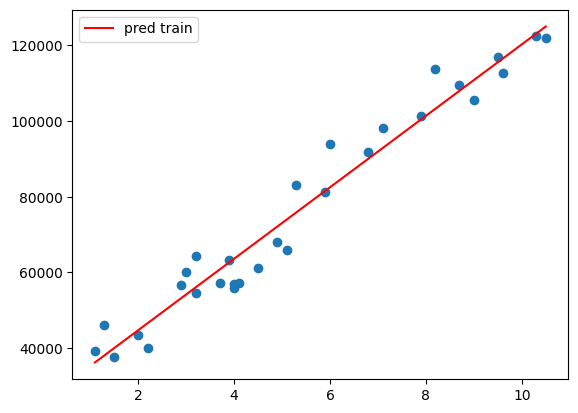

In [3]:
'''
     使用 sklearn api 实现线性回归
'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model as lm

# 数据准备
data = pd.read_csv('../data_test/Salary_Data.csv', header=0)

# plt.show()
# 整理输入数据（二维数据）train_x，输出数据（一维数据）train_y
train_x = data.iloc[:, :-1]
train_y = data.iloc[:, -1]
# 使用线性模型
model = lm.LinearRegression()
# 训练模型
model.fit(train_x, train_y)
# 测试预测
pred_train_y = model.predict(train_x)

plt.plot(train_x, pred_train_y, color = 'red', label='pred train')
x = data.values[:, 0]  # 第一列为 x 数据
y = data.values[:, 1]  # 第二列为 y 数据
# 绘制散点图查看数据分布
plt.scatter(x, y)

plt.legend()
plt.show()

## 模型评估
<hr>

1) 平均值绝对误差， 单个观测值与算术平均值的偏差的绝对值的平均
2) 均方误差， 单个样本到平均值差值的平方平均值
3) MAD（中位数绝对偏差），与数据中值绝对偏差的中值
4) R2决定系数，趋向于1，模型越好，趋向于0，模型越差

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model as lm
# 评估模块
import sklearn.metrics as sm
import pickle

# 数据准备
data = pd.read_csv('../data_test/Salary_Data.csv', header=0)
# 整理输入数据（二维数据）train_x，输出数据（一维数据）train_y
train_x = data.iloc[:, :-1] # 切片获取除了最后一列的所有列。返回一个 DataFarm 二维数组
train_y = data.iloc[:, -1] # 切片获取最后一列数据。返回一个一维数组
# 使用线性模型
model = lm.LinearRegression()
# 训练模型
model.fit(train_x.values, train_y.values)
# 假设我们的测试数据没有参加过训练
test_x = train_x.iloc[::4]
test_y = train_y[::4]
# 使用测试的 x 值去使用模型得到预测值。然后和真实的值做比较
pred_test_y = model.predict(test_x)
#模型评估, 评价绝对值误差
print(f'评价绝对误差：{sm.mean_absolute_error(test_y, pred_test_y)}')
print(f'评价平均平方误差(均方误差): {sm.mean_squared_error(test_y, pred_test_y)}')
print(f'评价中位数误差：{sm.median_absolute_error(test_y, pred_test_y)}')
print(f'R2得分: {sm.r2_score(test_y, pred_test_y)}')
# 保存模型
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)
print('模型保存成功')

# 读取模型
with open('./model.pickle', 'rb') as f:
    new_model = pickle.load(f)
print(f'预测一下: {new_model.predict(pd.DataFrame(data=[[1.1]]).values)}')


评价绝对误差：4587.366522327393
评价平均平方误差(均方误差): 29784216.419621635
评价中位数误差：4895.44536610986
R2得分: 0.964548495965924
模型保存成功
预测一下: [36187.15875227]


/home/jeremy/.local/lib/python3.8/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## 线性回归模型变种

In [10]:
''' 
    线性回归中包含强势样本的模型预测, 需要使用多项式回归来解决样本数据存在的强势样本导致的模型不准确
'''
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model as lm
import sklearn.metrics as sm
import numpy as np


df = pd.read_csv('../data_test/Salary_Data2.csv')
# 准备样本，整理输入集 x ，输出集 y
train_x = df.iloc[:, :-1]
train_y = df.iloc[:, -1]
# 创建线性回归模型
model = lm.LinearRegression()
# 训练
model.fit(train_x, train_y)
# 预测
pred_train_y = model.predict(train_x)
# 使用岭回归解决样本数据中存在的强势样本
alpha_list = np.arange(50, 150, 10)
for alpha in alpha_list:
    # 使用岭回归并进行训练, alpha 表示正则强度。强度越强压制效果越明显
    model_1 = lm.Ridge(alpha=alpha)
    model_1.fit(train_x, train_y)
    pred_ridge_y = model_1.predict(train_x)
    # 岭回归训练结果
    # plt.plot(train_x, pred_ridge_y, c='purple', label='ridge')
    # plt.plot(train_x, pred_train_y, c='red')
    # plt.scatter(train_x, train_y, c='blue')

    # plt.legend()
    # plt.show()

    # 评估模型
    df1 = pd.read_csv('../data_test/Salary_Data.csv')
    test_x = df1.iloc[:, :-1]
    test_y = df1.iloc[:, -1]
    pred_test_y = model_1.predict(test_x)
    print(f'R2得分: {sm.r2_score(test_y, pred_test_y)} alpha {alpha}')

R2得分: 0.8957908049338641 alpha 50
R2得分: 0.902627629143059 alpha 60
R2得分: 0.9077010682099786 alpha 70
R2得分: 0.9112252974125824 alpha 80
R2得分: 0.9133874865671169 alpha 90
R2得分: 0.9143515624566643 alpha 100
R2得分: 0.9142613900387686 alpha 110
R2得分: 0.9132434712699672 alpha 120
R2得分: 0.911409242048296 alpha 130
R2得分: 0.9088570331180404 alpha 140


## 多项式回归
<hr>
当数据集样本分布不是一个线性分布后，导致模型欠拟合，需要使用多项式回归

In [ ]:
''' 
    多项式回归的处理流程
    1. 先将多项式模型通过特征拓展器转换为线性模型
    2. 将转换后的模型交给线性模型处理
'''

import matplotlib.pyplot as pl
import pandas as pd
import sklearn.linear_model as lm



